In [1]:
print("my name is {},I am {} years old".format("ZhangQiMing","12"))

my name is ZhangQiMing,I am 12 years old


# SVM 适合应用于复杂但中小规模数据集的分类问题

## SVM 对特征缩放比较敏感

In [2]:
import numpy as np

In [3]:
a = np.array([1,2,3,4]) #使用np.array 可以使用每个位置的boolean来索引数据
#b = a[True,True,False,False]
b = a[[True,True,True,False]]
b

array([1, 2, 3])

In [4]:
import numpy as np #将list中的True FALSE映射为0和1 只需在打印时+0
a = np.array([True, False])
print(a)
print(a + 0)

[ True False]
[1 0]


In [5]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

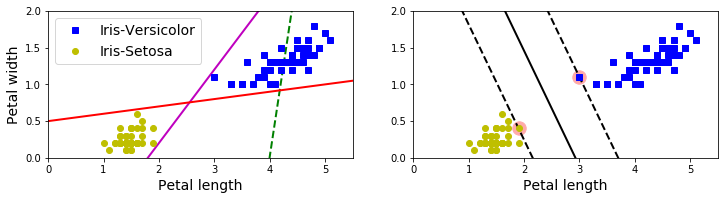

In [7]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor") #二维空间类别作图 感觉十分有用
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

#save_fig("large_margin_classification_plot")
plt.show()

# SVM对于特征缩放特别敏感

In [8]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [9]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svc_clf = SVC(kernel="linear",C=float("inf"))
svc_clf.fit(Xs,ys)

svc_clf_Scaled_Pipeline = Pipeline([
    ("scaled",StandardScaler()),
    ("svc_clf_Scaled",SVC(kernel="linear",C=float("inf")))
     ])
svc_clf_Scaled_Pipeline.fit(Xs,ys)

Pipeline(memory=None,
     steps=[('scaled', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc_clf_Scaled', SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

Pipeline可以通过getParam方法取出相应的键多对应的对象 可以直接使用

In [10]:
Xs_scaled =svc_clf_Scaled_Pipeline.get_params()["scaled"].fit_transform(Xs)

[-2, 2, -2, 2]

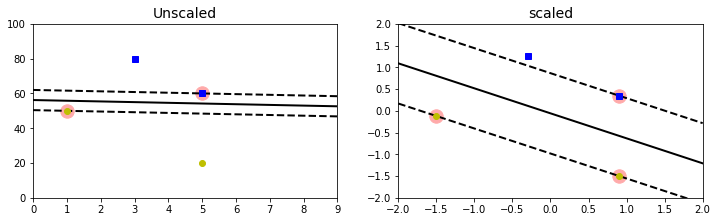

In [11]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plot_svc_decision_boundary(svc_clf, 0, 9)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bs")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "yo")
plt.title("Unscaled", fontsize=14)
plt.axis([0, 9, 0, 100])


plt.subplot(122)
plot_svc_decision_boundary(svc_clf_Scaled_Pipeline.get_params()["svc_clf_Scaled"], -2,2)
plt.plot(Xs_scaled[:, 0][ys==1], Xs_scaled[:, 1][ys==1], "bs")
plt.plot(Xs_scaled[:, 0][ys==0], Xs_scaled[:, 1][ys==0], "yo")
plt.title("scaled", fontsize=14)
plt.axis([-2, 2, -2, 2])           #下图表明归一化后 显著增强

In [12]:
moons = datasets.make_moons(n_samples=100, noise=0.15, random_state=42)
X = moons[0]
y = moons[1]

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaled', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc_poly', SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

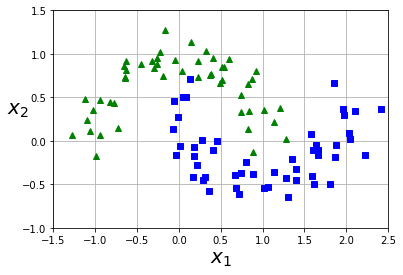

In [13]:
def plot_moons(X,y,axes):
    #plt.subplot(121)
    plt.plot(X[:,0][y==0],X[:,1][y==0],"g^")
    plt.plot(X[:,0][y==1],X[:,1][y==1],"bs")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
plot_moons(X,y,[-1.5,2.5,-1,1.5])
polynomial_svm_clf = Pipeline([
    ("poly_features",PolynomialFeatures(degree=3)),
    ("scaled",StandardScaler()),
    ("svc_poly",SVC(kernel="linear",C=float("inf")))
])
polynomial_svm_clf.fit(X,y)

# 多项式核

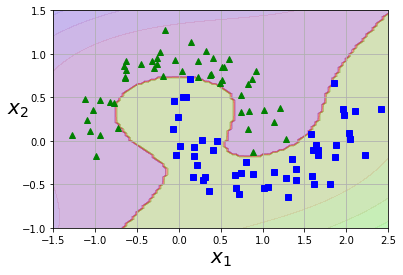

In [14]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_moons(X,y,[-1.5, 2.5, -1, 1.5])


plt.show()

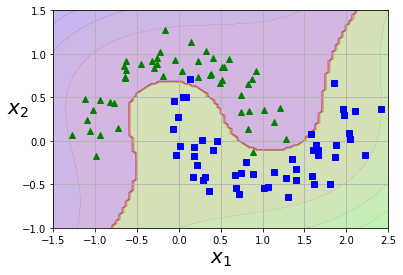

In [27]:
#超参数coef0代表高阶多项式与低阶多项式对模型的影响  
polynomial_svm_clf = Pipeline([
    #("poly_features",PolynomialFeatures(degree=3)),
    ("scaled",StandardScaler()),
    ("svc_poly",SVC(kernel="poly",degree=3,coef0=1,C=5,gamma="auto"))
])
polynomial_svm_clf.fit(X,y)


plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_moons(X,y,[-1.5, 2.5, -1, 1.5])

linear核函数 $$K(x_{i},x_{j}) = (x_{i}^{T}\cdot x_{j}) $$
polynomial核函数$(\gamma>0)$    $$K(x_{i},x_{j}) = (\gamma x_{i}^{T}\cdot x_{j} + r)^{d}            $$
RBF核函数$ (\gamma>0)$ $$K(x_{i},x_{j}) = exp(\gamma x_{i}^{T}\cdot x_{j} + r)^{2}            $$
sigmoid核函数 $$K(x_{i},x_{j}) = tanh(\gamma x_{i}^{T}\cdot x_{j} + r)$$

Text(0.5,1,"degree=10,coef0=100,C=5,gamma='auto'")

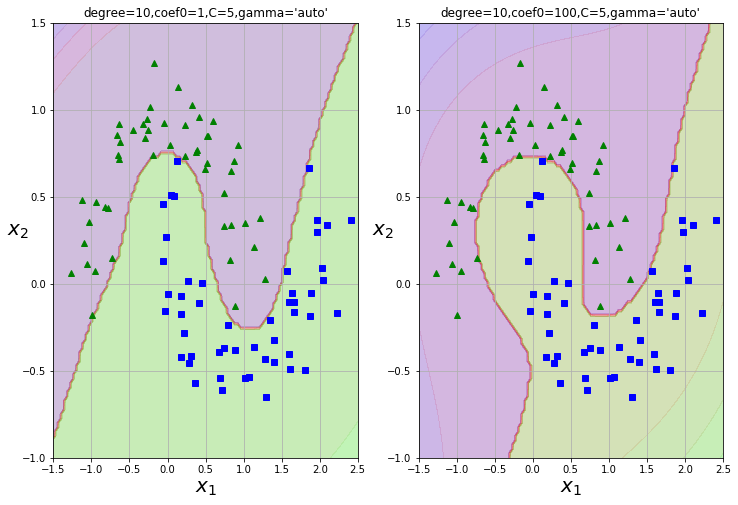

In [16]:
polynomial_svm_clf = Pipeline([
    #("poly_features",PolynomialFeatures(degree=3)),
    ("scaled",StandardScaler()),
    ("svc_poly",SVC(kernel="poly",degree=10,coef0=1,C=5,gamma="auto"))
])
polynomial_svm_clf.fit(X,y)

poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5,gamma="auto"))
    ])
poly100_kernel_svm_clf.fit(X, y)

plt.figure(figsize=(12,8))
plt.subplot(121)
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_moons(X,y,[-1.5, 2.5, -1, 1.5])
plt.title("degree=10,coef0=1,C=5,gamma='auto'")

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_moons(X,y,[-1.5, 2.5, -1, 1.5])
plt.title("degree=10,coef0=100,C=5,gamma='auto'")

# 增加相似特征

### RBF径向基函数
$$\\o _{\gamma }(x,l) = exp(-\gamma\left \| x-l \right \|^{2})$$

# 高斯RBF核 较小的$\gamma$使得钟形曲线变得更宽，判定边界变得更平滑

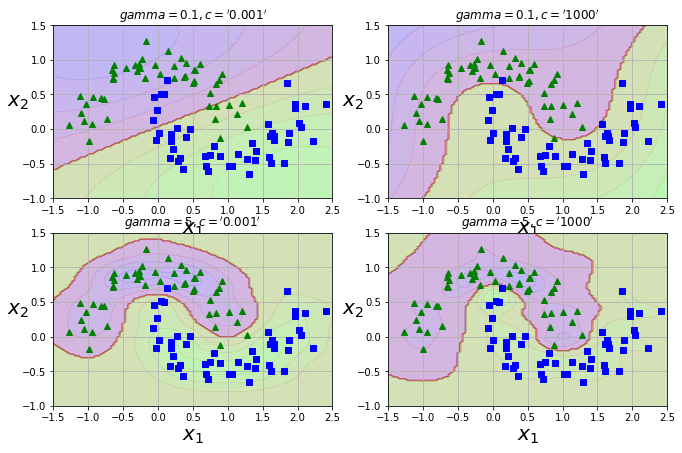

In [28]:

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svc_clf=[]
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
    ])
    rbf_kernel_svm_clf.fit(X, y)
    svc_clf.append(rbf_kernel_svm_clf)
    
    
plt.figure(figsize=(11, 7))
for i,clf in enumerate(svc_clf):
    
    
    plt.subplot(221+i)
    plot_predictions(clf, [-1.5, 2.5, -1, 1.5])
    plot_moons(X,y,[-1.5, 2.5, -1, 1.5])
    gamma,c = hyperparams[i]
    plt.title(r"$gamma={},c='{}'$".format(gamma,c))


## Regression

In [105]:
np.random.seed(42)
m = 50
X = np.random.rand(m,1)
y = (4 + 3*X + np.random.randn(m,1)).ravel()

In [106]:
from sklearn.svm import LinearSVR

svr_reg_Pipline1= Pipeline([
    ("scale",StandardScaler()),
    ("svr_reg",LinearSVR(epsilon=1.5))
])
#svr_reg = LinearSVR(epsilon=1.5)
svr_reg_Pipline1.fit(X,y)

svr_reg_Pipline2= Pipeline([
    ("scale",StandardScaler()),
    ("svr_reg",LinearSVR(epsilon=0.5))
])
#svr_reg = LinearSVR(epsilon=1.5)
svr_reg_Pipline2.fit(X,y)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr_reg', LinearSVR(C=1.0, dual=True, epsilon=0.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])

In [107]:
def find_suppost_vector(svr,X,y):
    y_pred = svr.predict(X)
    off_margin = (np.abs(y-y_pred)>=svr.epsilon)
    return np.argwhere(off_margin)

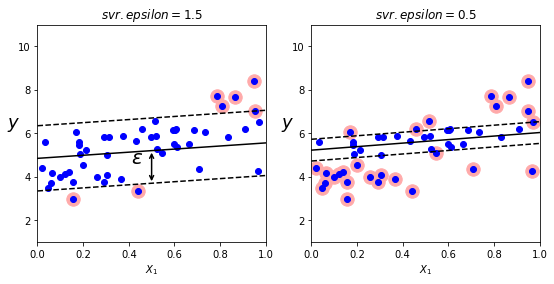

In [108]:
def plot_svr_Pic(svr,axes):
    Xs = np.linspace(axes[0],axes[1],100)
    y_pred = svr.predict(Xs.reshape(100,1))
    plt.plot(X,y,"bo")
    plt.axis(axes)
    support = find_suppost_vector(svr,X,y)
    plt.plot(Xs,y_pred,"k-")
    plt.plot(Xs,y_pred+svr.epsilon,"k--")
    plt.plot(Xs,y_pred-svr.epsilon,"k--")
    plt.scatter(X[support.ravel()],y[support.ravel()],s=180, facecolors='#FFAAAA')
    plt.xlabel("$X_{1}$")
    plt.ylabel(r"$y$", fontsize=18, rotation=0)
    plt.title("$svr.epsilon={}$".format(svr.epsilon))

plt.figure(figsize=(9, 4))
plt.subplot(121)

eps_x1 = 0.5
eps_y_pred = svr_reg_Pipline1.get_params()["svr_reg"].predict([[eps_x1]])

plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svr_reg_Pipline1.get_params()["svr_reg"].epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.41, 4.6, r"$\epsilon$", fontsize=20)

plot_svr_Pic(svr_reg_Pipline1.get_params()["svr_reg"],[0,1,1,11])   
plt.subplot(122)
plot_svr_Pic(svr_reg_Pipline2.get_params()["svr_reg"],[0,1,1,11])   


In [109]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [119]:
from sklearn.svm import SVR

svr_reg_Pipline3= Pipeline([
    ("scale",StandardScaler()),
    ("svr_reg",SVR(kernel="poly",degree = 2,C= 100,gamma="auto",epsilon=0.1))
])
#svr_reg = LinearSVR(epsilon=1.5)
svr_reg_Pipline3.fit(X,y)

svr_reg_Pipline4= Pipeline([
    ("scale",StandardScaler()),
    ("svr_reg",SVR(kernel="poly",degree = 2,C= 0.01,gamma="auto",epsilon=0.1))
])
#svr_reg = LinearSVR(epsilon=1.5)
svr_reg_Pipline4.fit(X,y)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr_reg', SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

Text(0,0.5,'$y$')

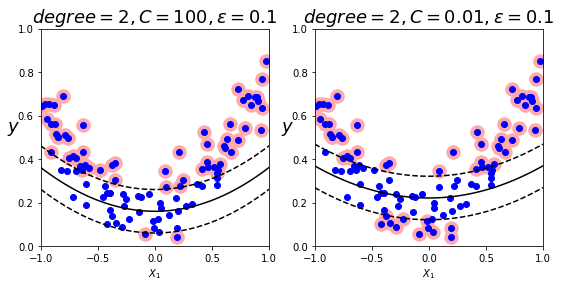

In [120]:
plt.figure(figsize=(9, 4))
plt.subplot(121)

plot_svr_Pic(svr_reg_Pipline3.get_params()["svr_reg"],[-1,1,0,1])   
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svr_reg_Pipline3.get_params()["svr_reg"].degree, svr_reg_Pipline3.get_params()["svr_reg"].C, svr_reg_Pipline3.get_params()["svr_reg"].epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
# plot_svr_Pic(svr_reg_Pipline2.get_params()["svr_reg"],[-1,1,0,1])   
plot_svr_Pic(svr_reg_Pipline4.get_params()["svr_reg"],[-1,1,0,1])   
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svr_reg_Pipline4.get_params()["svr_reg"].degree, svr_reg_Pipline4.get_params()["svr_reg"].C, svr_reg_Pipline4.get_params()["svr_reg"].epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)